# Week 14 GroupBy Mechanics

Many data processing follows a **split-apply-combine** process. For example, you may want to do the following operations to analyze a dataset about sales:
1. What is the total revenue of each day?
2. What is the total sales of each product?
3. How much has each client purchased in total?

These operations all requires that you split the data into groups, and then apply certain calculations to each of the groups, and finally combine all results into a new table. In Pandas this is mostly done with `groupby()` function.

**Readings**
- Textbook, Chapter 10

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# An example:
df = pd.DataFrame({'Name' : ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Charlie'],
                   'Course' : ['Programming', 'Programming', 'Programming','Data Structure', 'Data Structure','Data Structure',],
                   'Semester': ['Spring 2019', 'Fall 2019', 'Fall 2019', 'Spring 2019', 'Fall 2019', 'Spring 2019'],
                   'Homework' : np.random.randint(60, 100, size=6),
                   'Exam' : np.random.randint(60, 100, size=6)})
df

,Name,Course,Semester,Homework,Exam
0,Alice,Programming,Spring 2019,89,94
1,Bob,Programming,Fall 2019,82,82
2,Charlie,Programming,Fall 2019,87,89
3,Alice,Data Structure,Spring 2019,91,72
4,Bob,Data Structure,Fall 2019,66,98
5,Charlie,Data Structure,Spring 2019,65,96


In [3]:
# Split exam scores according to name
groups = df['Exam'].groupby(df['Name'])

groups

In [4]:
# Apply mean() function to find the average value for each group
means = groups.mean()

means

Name
Alice      83.0
Bob        90.0
Charlie    92.5
Name: Exam, dtype: float64

We obtain a **data series**. It can be converted to a data frame by `to_frame()` method.

In [7]:
# A common practice is to convert the results to a data frame
df_means = means.to_frame(name='Average Exam Score')

df_means

,Average Exam Score
Name,
Alice,83.0
Bob,90.0
Charlie,92.5


In [10]:
# Put all operations in one statement
df_means = df['Exam'].groupby(df['Name']).mean().to_frame("Average Exam Score")

df_means

,Average Exam Score
Name,
Alice,83.0
Bob,90.0
Charlie,92.5


In [19]:
# Exercise: Find the average homework score and exam score for each course

groups = df[['Homework', 'Exam']].groupby(df['Course'])

# Inspect the groups
# for group in groups:
#     print(group)

groups.mean()

# Do this in one statement:
df[['Homework', 'Exam']].groupby(df['Course']).mean()

# A different statement can achieve the same thing:
df.groupby("Course")["Homework","Exam"].mean()

<ipython-input-19-251a8703c254>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Course")["Homework","Exam"].mean()


,Homework,Exam
Course,,
Data Structure,74.0,88.666667
Programming,86.0,88.333333


## Split Data with Multiple Columns

We can use more than one column as keys to split data into groups.

In [20]:
# Split the exam score according to both course name and semester.
groups = df['Exam'].groupby([df['Course'], df['Semester']])

In [21]:
# Calculate the average score
means = groups.mean()

means

Course          Semester   
Data Structure  Fall 2019      98.0
                Spring 2019    84.0
Programming     Fall 2019      85.5
                Spring 2019    94.0
Name: Exam, dtype: float64

In [22]:
# Convert the result to a data frame
df_means = means.to_frame(name='Average Exam Score')

df_means

Average Exam Score
Course         Semester                       
Data Structure Fall 2019                  98.0
               Spring 2019                84.0
Programming    Fall 2019                  85.5
               Spring 2019                94.0

`means` is a data series with **hierarchical indexing**. It can be converted to a data frame using `unstack()`.

In [23]:
means.index

MultiIndex([('Data Structure',   'Fall 2019'),
            ('Data Structure', 'Spring 2019'),
            (   'Programming',   'Fall 2019'),
            (   'Programming', 'Spring 2019')],
           names=['Course', 'Semester'])

In [24]:
means.unstack()

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,98.0,84.0
Programming,85.5,94.0


We can specify which index to be unstacked.

In [25]:
means.unstack(level=0)

Course,Data Structure,Programming
Semester,,
Fall 2019,98.0,85.5
Spring 2019,84.0,94.0


In [26]:
means.unstack(level=1)

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,98.0,84.0
Programming,85.5,94.0


In [27]:
# Exercise:
# Using one statement, create the above data frame directly from df.

df['Exam'].groupby([df['Course'], df['Semester']]).mean().unstack()

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,98.0,84.0
Programming,85.5,94.0


We can split the entire data set instead of one column.

In [28]:
df.groupby([df['Course'], df['Semester']]).mean()

Homework  Exam
Course         Semester                   
Data Structure Fall 2019        66.0  98.0
               Spring 2019      78.0  84.0
Programming    Fall 2019        84.5  85.5
               Spring 2019      89.0  94.0

In [29]:
# Frequently the grouping information is found in the same data frame as the data 
# you want to work on. In that case, simply put column names as the keys:
df.groupby(['Course', 'Semester']).mean()

Homework  Exam
Course         Semester                   
Data Structure Fall 2019        66.0  98.0
               Spring 2019      78.0  84.0
Programming    Fall 2019        84.5  85.5
               Spring 2019      89.0  94.0

In [32]:
# df['Exam'].groupby([df['Course'], df['Semester']]).mean().unstack()
df.groupby(['Course', 'Semester'])['Exam'].mean().unstack()

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,98.0,84.0
Programming,85.5,94.0


In [37]:
# Exercise:
# Use `size()` method to find the number of students for each course 
# in each semester

df.groupby(['Course', 'Semester'])['Name'].size().unstack(level=1)
# df.groupby(['Course', 'Semester']).size().unstack(level=1)

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,1,2
Programming,2,1


## Iterating Over Groups

The GroupBy object support iteration, providing a sequence of 2-tuples containing the group name along with the data.

In [38]:
# Show the content of each group.
groups = df.groupby('Name')
for name, group in groups:
    print("Name:", name)
    print(group)

Name: Alice
    Name          Course     Semester  Homework  Exam
0  Alice     Programming  Spring 2019        89    94
3  Alice  Data Structure  Spring 2019        91    72
Name: Bob
  Name          Course   Semester  Homework  Exam
1  Bob     Programming  Fall 2019        82    82
4  Bob  Data Structure  Fall 2019        66    98
Name: Charlie
      Name          Course     Semester  Homework  Exam
2  Charlie     Programming    Fall 2019        87    89
5  Charlie  Data Structure  Spring 2019        65    96


**Syntactic sugar**: It is simpler to use the following statement for selecting columns for groupby()

In [ ]:
df.groupby('Name')['Exam'].mean()

In [ ]:
# The standard statement
df['Exam'].groupby(df['Name']).mean()

In [40]:
# The following statement does not work because 
# 'Name' is not a column in df['Exam']

# df['Exam'].groupby('Name').mean()
# df.groupby(df['Name'])['Exam'].mean() # This is ok

Name
Alice      83.0
Bob        90.0
Charlie    92.5
Name: Exam, dtype: float64

## **Grouping with dictionary**
We can use a seperate dictionary to decide the groups.

In [41]:
genders = {
    "Alice": "Female",
    "Bob": "Male",
    "Charlie": "Male"
}

In [42]:
data = df.set_index("Name")

data

,Course,Semester,Homework,Exam
Name,,,,
Alice,Programming,Spring 2019,89,94
Bob,Programming,Fall 2019,82,82
Charlie,Programming,Fall 2019,87,89
Alice,Data Structure,Spring 2019,91,72
Bob,Data Structure,Fall 2019,66,98
Charlie,Data Structure,Spring 2019,65,96


In [43]:
# Split the data according to gender
data.groupby(genders).size()

Female    2
Male      4
dtype: int64

In [44]:
# One can also use a list to indicate the grouping information
# Not recommended because it is hard to understand
genders = ['F', 'M', 'M', 'F', 'M', 'M']

data.groupby(genders).size()

F    2
M    4
dtype: int64

In [50]:
# If we sort the data frame, then the dictionary still works, but the list may cause an error.
data = data.sort_values('Homework')

genders_dict = {
    "Alice": "Female",
    "Bob": "Male",
    "Charlie": "Male"
}

groups = data.groupby(genders_dict) # The result remains correct after sorting

for label, group in groups:
    print(label)
    print(group)
    
print('-' * 20)

genders_list = ['F', 'M', 'M', 'F', 'M', 'M']
groups = data.groupby(genders_list) # The result is now incorrect

for label, group in groups:
    print(label)
    print(group)
    
data

Female
               Course     Semester  Homework  Exam
Name                                              
Alice     Programming  Spring 2019        89    94
Alice  Data Structure  Spring 2019        91    72
Male
                 Course     Semester  Homework  Exam
Name                                                
Charlie  Data Structure  Spring 2019        65    96
Bob      Data Structure    Fall 2019        66    98
Bob         Programming    Fall 2019        82    82
Charlie     Programming    Fall 2019        87    89
--------------------
F
                 Course     Semester  Homework  Exam
Name                                                
Charlie  Data Structure  Spring 2019        65    96
Charlie     Programming    Fall 2019        87    89
M
               Course     Semester  Homework  Exam
Name                                              
Bob    Data Structure    Fall 2019        66    98
Bob       Programming    Fall 2019        82    82
Alice     Programming  Sp

,Course,Semester,Homework,Exam
Name,,,,
Charlie,Data Structure,Spring 2019,65,96
Bob,Data Structure,Fall 2019,66,98
Bob,Programming,Fall 2019,82,82
Charlie,Programming,Fall 2019,87,89
Alice,Programming,Spring 2019,89,94
Alice,Data Structure,Spring 2019,91,72


In [ ]:
# Exercise: Calculate the average scores for each gender
data.groupby(genders).mean()

## Grouping with functions

Any function passed as a group key will be called once per index value, with the returned values being used as the group names.

In [51]:
def get_initial(name):
    return name[0]

In [52]:
data.groupby(get_initial).mean()

,Homework,Exam
A,90.0,83.0
B,74.0,90.0
C,76.0,92.5


In [53]:
# The function can be defined via lambda expression
data.groupby(lambda x: x[0]).mean()

,Homework,Exam
A,90.0,83.0
B,74.0,90.0
C,76.0,92.5


## Example: Analyzing Cellphone History

In [3]:
# Reference:
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
url = "https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2015/06/phone_data.csv"
data = pd.read_csv(url, index_col='index')
print(data.shape)
data.head(3)

(830, 6)


,date,duration,item,month,network,network_type
index,,,,,,
0,15/10/14 06:58,34.429,data,2014-11,data,data
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile


1. **date**: The date and time of the entry
2. **duration**: The duration (in seconds) for each call, the amount of data (in MB) for each data entry, and the number of texts sent (usually 1) for each sms entry.
3. **item**: A description of the event occurring – can be one of call, sms, or data.
4. **month**: The billing month that each entry belongs to – of form ‘YYYY-MM’.
5. **network**: The mobile network that was called/texted for each entry.
6. **network_type**: Whether the number being called was a mobile, international (‘world’), voicemail, landline, or other (‘special’) number.

In [4]:
# The date information is now properly recognized
data.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [5]:
# Convert date column from string to datetime objects
data['date'] = data['date'].astype(np.datetime64)
data.head(3)

,date,duration,item,month,network,network_type
index,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          830 non-null    datetime64[ns]
 1   duration      830 non-null    float64       
 2   item          830 non-null    object        
 3   month         830 non-null    object        
 4   network       830 non-null    object        
 5   network_type  830 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 45.4+ KB


In [7]:
# Which months are covered in this data set?

data['month'].value_counts().sort_index()

2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: month, dtype: int64

In [8]:
# What is the longest call duration for each month?

# Extract the records related to "call"
temp = data[data['item'] ==  'call']
# temp.head()

# Group the records by month
groups = temp.groupby('month')['duration']
# for month, group in groups:
#     print(month)
#     print(group.head())

# Find the largest value in each group
groups.max().to_frame("Longest Call")


,Longest Call
month,
2014-11,1940.0
2014-12,2120.0
2015-01,1859.0
2015-02,1863.0
2015-03,10528.0


In [65]:
data[data['item'] == 'call'].groupby('month')['duration'].max().to_frame("Longest Call")

,Longest Call
month,
2014-11,1940.0
2014-12,2120.0
2015-01,1859.0
2015-02,1863.0
2015-03,10528.0


<AxesSubplot:xlabel='month'>

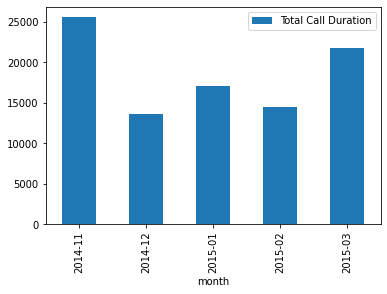

In [15]:
# What is the total call durations of each month?

# 1. Extract the call records from the data frame.
temp = data[data['item'] == "call"]
# temp['item'].value_counts()

# 2. Split the call records into groups according to the month value.
groups = temp.groupby("month")["duration"]
# for month, group in groups:
#     print("Month:", month)
#     print(group.head())
#     print("-"*20)

# 3. Apply the sum() function to each group.
results = groups.sum()
# print(results)

# 4. Convert the results to a data frame.
results = results.to_frame("Total Call Duration")
results

# 5.(optional) Visualize the results
results.plot.bar()

<AxesSubplot:xlabel='month'>

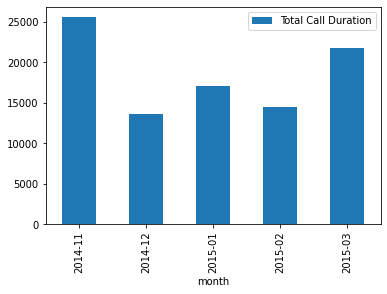

In [16]:
data[data['item'] == "call"].groupby("month")["duration"].sum().to_frame("Total Call Duration").plot.bar()

<AxesSubplot:ylabel='month'>

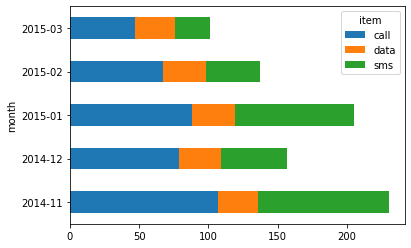

In [27]:
# How many calls, messages, and data entries are there in each month?

# 1. Split the data frame according to months.
groups = data.groupby('month')
# for label, group in groups:
#     print("Label:", label)
#     print(group.head())
    
# 2. Count how many events there are for each type in each month
results = groups['item'].value_counts()
# results

# 3. Convert the result to a data frame.
# results.to_frame("Number of call, sms, or data")
results_df = results.unstack(level=1)
# results.unstack(level=0)

# 4. (Optional) Visualize the results
results_df.plot.barh(stacked=True)

In [36]:
# How many instances are there per month, splitted by network_type?

# 1. Split the data according to month and network type.
groups = data.groupby(['month', 'network_type'])['date']
# for label, group in groups:
#     print("Label:", label)
#     print(group.head())

# 2. Count how many instances there are in each group
results = groups.count()
# results

# 3. Present the results in a better format
results = results.unstack(level=1)

# 4. There are some missing values. Put 0 in these cells
results = results.fillna(0)

# 5. Change the data type from floats to int
results = results.astype(int)
results

network_type,data,landline,mobile,special,voicemail,world
month,,,,,,
2014-11,29,5,189,1,6,0
2014-12,30,7,108,0,8,4
2015-01,31,11,160,0,3,0
2015-02,31,8,90,2,6,0
2015-03,29,11,54,0,4,3
